In [1]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

In [2]:
from apps.optics.noise_searcher2 import NoiseSearcher2
from src.general_methods.visualizer import Visualizer
from src.optics.config_manager import ChannelConfig
import os
import yaml

In [3]:
dir_path = """
/data/yarcoh/thesis_data/data/outputs/ber_maps/2023.09.13-18.45.01_medium_search_channel_v2
""".strip()

In [4]:
# read config file from dir_path and insert those values into ChannelConfig
config_path = os.path.join(dir_path, 'cs_config.yml')

# read yaml:
with open(config_path, 'r') as stream:
    conf = yaml.safe_load(stream)

Visualizer.print_config(conf)

{
    "K_T": 1.13,
    "L": 960,
    "La": 80,
    "M_QAM": 16,
    "N_sc": 256,
    "N_sc_raw": 237.50440461138834,
    "Nos": 16,
    "Nspans": 12,
    "Pn": 8.964743939765935e-06,
    "T0": 5120.0,
    "T_guardband": 4750.0880922277665,
    "Tb": 10240.0,
    "Tn": 1358.1221810508403,
    "Ts": 1.0,
    "W": 0.05,
    "Zn": 87833.13612677579,
    "bet": 0.2,
    "beta2": -21.0,
    "chi": 0.0461,
    "dz": 0.2,
    "eta": 2,
    "gamma": 1.27,
    "mu": 0.15,
    "verbose": false,
    "with_noise": true,
    "with_ssf": true
}


In [5]:
channel_config = ChannelConfig(**conf)
ns = NoiseSearcher2.load_from_config(channel_config)

BERs, mus = ns.load_ber_map(dir_path)


In [6]:
ns.print_ber_vec(BERs, mus)

              mu          BER
----------------  -----------
     0.01         0.34707
     0.0204336    0.19375
     0.0417532    0.0460938
     0.0853168    0.000292969
     0.174333     0
     0.356225     0.000683594
     0.727895     0.26123
     1.48735      0.462305
     3.0392       0.696484
     6.21017      0.872266
    12.6896       0.680469
    25.9294       0.556934
    52.9832       0.810547
   108.264        0.81416
   221.222        0.805176
   452.035        0.682715
   923.671        0.621094
  1887.39         0.873437
  3856.62         0.62207
  7880.46         0.810449
 16102.6          0.685547
 32903.4          0.809473
 67233.6          0.746777
137382            0.498145
280722            0.55957
573615            0.683594
     1.1721e+06   0.813574
     2.39503e+06  0.682617
     4.8939e+06   0.872852
     1e+07        0.682813


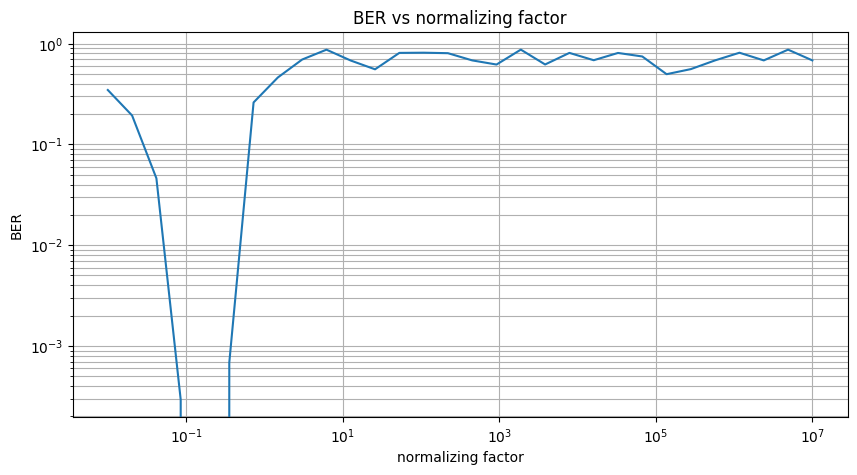

In [7]:
ns.plot_ber_map(BERs, mus,log_mu=True)